<a href="https://colab.research.google.com/github/Sangeetha-122/projects-in-ML/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

In [46]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [47]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [49]:
data.shape

(10000, 14)

In [50]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [53]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [54]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [55]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [56]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [58]:
data = pd.get_dummies(data,drop_first=True)

In [59]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [60]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [61]:
import seaborn as sns

<Axes: ylabel='count'>

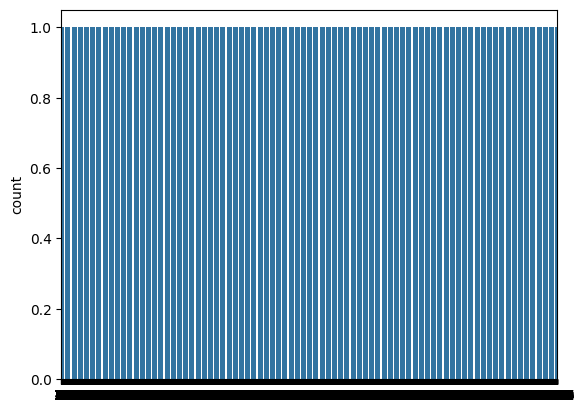

In [62]:
sns.countplot(data['Exited'])

In [63]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [66]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [67]:
from sklearn.model_selection import train_test_split


In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc= StandardScaler()

In [71]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
X_train

array([[ 1.22148081,  0.90828118,  1.18827241, ..., -0.75737481,
         1.56876258,  0.80903983],
       [ 1.09085513,  0.10418812, -1.39252527, ..., -0.75737481,
        -0.63744509,  0.80903983],
       [ 0.2962156 ,  0.70725792,  1.18827241, ...,  1.32035023,
        -0.63744509, -1.23603308],
       ...,
       [ 0.19824634,  0.20469975,  1.18827241, ..., -0.75737481,
        -0.63744509,  0.80903983],
       [ 0.14381897,  1.51135098,  0.45090165, ..., -0.75737481,
        -0.63744509,  0.80903983],
       [ 0.52481053,  1.00879282, -1.39252527, ...,  1.32035023,
        -0.63744509,  0.80903983]])

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
log = LogisticRegression()

In [75]:
log.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred1 = log.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred1)

0.7818581293157565

In [79]:
accuracy_score(y_test,y_pred1)

0.7818581293157565

In [80]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [81]:
precision_score(y_test,y_pred1)

0.769811320754717

In [82]:
recall_score(y_test,y_pred1)

0.7881519639407598

In [83]:
f1_score(y_test,y_pred1)

0.7788736875596564

In [90]:
TP = 50  # True Positives
FP = 10  # False Positives
FN = 5

pc = TP / (FP + TP)
print("Precision:", pc)

Precision: 0.8333333333333334


In [91]:
pc = TP / (FP + TP)

In [92]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8333333333333334
Recall: 0.9090909090909091


In [93]:
rc = TP / (TP + FN)

In [94]:
from sklearn import svm

In [95]:
svm = svm.SVC()

In [96]:
svm.fit(X_train,y_train)

SVC()

In [100]:
y_pred2 = svm.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred2)

0.8405524168236033

In [102]:
precision_score(y_test,y_pred2)

0.8426229508196721

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier()

In [105]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [107]:
y_pred3 = knn.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred3)

0.8148148148148148

In [109]:
precision_score(y_test,y_pred3)

0.7996266334785315

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dt = DecisionTreeClassifier()

In [112]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred4 = dt.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred4)

0.7959824231010671

In [115]:
precision_score(y_test,y_pred4)

0.7771639042357275

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbc = GradientBoostingClassifier()

In [118]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [119]:
y_pred6 = gbc.predict(X_test)

In [120]:
accuracy_score(y_test,y_pred6)

0.8452605147520402

In [121]:
precision_score(y_test,y_pred6)

0.8455019556714471

In [123]:
from sklearn.metrics import accuracy_score


In [126]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

NameError: name 'model1' is not defined

In [124]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

NameError: name 'y_pred5' is not defined

In [ ]:
final_data

In [128]:
import seaborn as sns

In [129]:
sns.barplot(final_data['Models'],final_data['ACC'])

NameError: name 'final_data' is not defined

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [127]:
final_data

NameError: name 'final_data' is not defined

In [ ]:
sns.barplot(final_data['Models'],final_data['PRE'])

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
rf.fit(X_res,y_res)

In [ ]:
import joblib